# 1. Setup and Installation

In [2]:
# First, let's make sure we have all the necessary libraries
# If you're using Google Colab, these are already installed
# If you're using local Jupyter, run: pip install numpy pandas matplotlib scikit-learn seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

# 2. Understanding Regularization (Theory)

## What is Regularization?

- Regularization prevents overfitting by adding a penalty to large coefficients

- Ridge (L2): Penalizes the square of coefficients (shrinks them)

- Lasso (L1): Penalizes the absolute value of coefficients (can set them to zero)

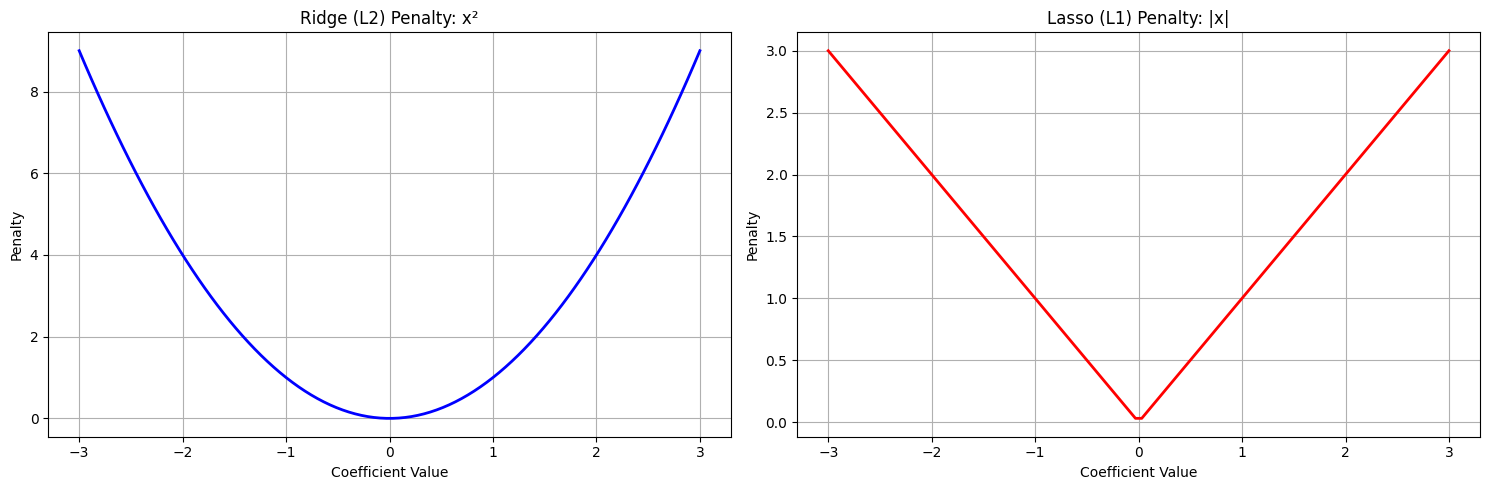

In [3]:
# Visual explanation of Ridge vs Lasso
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Ridge (L2) penalty visualization
x = np.linspace(-3, 3, 100)
y_ridge = x**2
ax1.plot(x, y_ridge, 'b-', linewidth=2)
ax1.set_title('Ridge (L2) Penalty: x²')
ax1.set_xlabel('Coefficient Value')
ax1.set_ylabel('Penalty')
ax1.grid(True)

# Lasso (L1) penalty visualization
y_lasso = np.abs(x)
ax2.plot(x, y_lasso, 'r-', linewidth=2)
ax2.set_title('Lasso (L1) Penalty: |x|')
ax2.set_xlabel('Coefficient Value')
ax2.set_ylabel('Penalty')
ax2.grid(True)

plt.tight_layout()
plt.show()

# 3. Data Preparation

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create sample data with some irrelevant features
# n_samples: number of data points
# n_features: number of features (variables)
# n_informative: number of relevant features
# noise: random noise added to make it realistic

X, y = make_regression(n_samples=1000, n_features=20, 
                       n_informative=10,  # Only 10 features actually matter
                       noise=0.5, random_state=42)

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"\nTraining set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Scale the features (VERY IMPORTANT for regularization)
# Regularization treats all features equally, so we need to scale them

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFirst 5 scaled training samples:")
print(X_train_scaled[:5, :5])  # Show first 5 samples and first 5 features

# 4. Ordinary Least Squares (Baseline)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Create and train OLS model
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)

# Make predictions
ols_train_pred = ols.predict(X_train_scaled)
ols_test_pred = ols.predict(X_test_scaled)

# Calculate performance metrics
ols_train_r2 = r2_score(y_train, ols_train_pred)
ols_test_r2 = r2_score(y_test, ols_test_pred)
ols_train_mse = mean_squared_error(y_train, ols_train_pred)
ols_test_mse = mean_squared_error(y_test, ols_test_pred)

print("Ordinary Least Squares (OLS) Results:")
print(f"Training R²: {ols_train_r2:.4f}")
print(f"Testing R²:  {ols_test_r2:.4f}")
print(f"Training MSE: {ols_train_mse:.4f}")
print(f"Testing MSE:  {ols_test_mse:.4f}")

# Look at the coefficients
print(f"\nNumber of non-zero coefficients: {np.sum(ols.coef_ != 0)}")
print("Coefficient values:")
for i, coef in enumerate(ols.coef_):
    print(f"Feature {i+1}: {coef:.4f}")

# 5. Ridge Regression Implementation

In [ ]:
from sklearn.linear_model import Ridge

# Define different alpha values to try
# Alpha (λ) is the regularization strength
# Larger alpha = more regularization = simpler model
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

ridge_results = []
ridge_coefs = []

print("Ridge Regression Results:")
print("Alpha\t\tTrain R²\tTest R²\t\tNon-zero Coefs")
print("-" * 55)

for alpha in alphas:
    # Create and train Ridge model
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train_scaled, y_train)
    
    # Make predictions
    train_pred = ridge.predict(X_train_scaled)
    test_pred = ridge.predict(X_test_scaled)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    non_zero = np.sum(ridge.coef_ != 0)
    
    ridge_results.append({
        'alpha': alpha,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'non_zero': non_zero
    })
    
    ridge_coefs.append(ridge.coef_)
    
    print(f"{alpha:8.4f}\t{train_r2:.4f}\t\t{test_r2:.4f}\t\t{non_zero}")

# Convert to DataFrame for easier analysis
ridge_df = pd.DataFrame(ridge_results)
print("\nBest alpha based on test R²:")
best_ridge = ridge_df.loc[ridge_df['test_r2'].idxmax()]
print(f"Alpha: {best_ridge['alpha']}, Test R²: {best_ridge['test_r2']:.4f}")